In [1]:
import pandas as pd
import numpy as np

In [88]:
#concat 2018
#read_cvs
jan = pd.read_csv("jan_reviews.csv").dropna()
feb = pd.read_csv("feb_reviews.csv").dropna()
mar = pd.read_csv("mar_reviews.csv").dropna()
apr = pd.read_csv("apr_reviews.csv").dropna()
may = pd.read_csv("may_reviews.csv").dropna()
jun = pd.read_csv("jun_reviews.csv").dropna()
jul = pd.read_csv("july_reviews.csv").dropna()
aug = pd.read_csv("aug_reviews.csv").dropna()
sep = pd.read_csv("sep_reviews.csv").dropna()
octb = pd.read_csv("oct_reviews.csv").dropna()
nov = pd.read_csv("nov_reviews.csv").dropna()
dec = pd.read_csv("dec_reviews.csv").dropna()

In [86]:
print(jan.head(1))
print(jan.count())

   listing_id         id        date  reviewer_id reviewer_name  \
0    16457286  126384095  2017-01-11    108078029           Chi   

                         comments  
0  it was really nice. Thank you!  
listing_id       889093
id               889093
date             889093
reviewer_id      889093
reviewer_name    889093
comments         889093
dtype: int64


In [89]:
#add months
frames = [jan, feb , mar, apr, may, jun, jul, aug, sep, octb, nov, dec]
#concatenate frames
Concat2018 = pd.concat(frames)
print(Concat2018.head())
print(Concat2018.count())

   listing_id         id        date  reviewer_id reviewer_name  \
0    16457286  126384095  2017-01-11    108078029           Chi   
1    16457286  130827603  2017-02-08     56505541         Erjon   
2     1356652   18507233  2014-08-27      1260729      Valencia   
3     1356652  190971471  2017-09-05     25649529       Josiane   
4      775016  131244834  2017-02-11     20400377    Dada Unity   

                                            comments  
0                     it was really nice. Thank you!  
1  The host canceled this reservation 2 days befo...  
2  Darlene and her sister were very welcoming. I ...  
3  Darlene is really a great host , she let me ar...  
4  The Reggae Den is in a Great community ,,,I lo...  
listing_id       11705023
id               11705023
date             11705023
reviewer_id      11705023
reviewer_name    11705023
comments         11705023
dtype: int64


In [16]:
# add review date (year)
#Concat2018['Review Date'] = "2018"

In [93]:
#file & cols needed + comments         11705023#rename col, index val
comm2018 = Concat2018[['listing_id', 'comments' ]].rename(index=str, columns={"listing_id":"id"})
comm2018.head()

,id,comments
0,16457286,it was really nice. Thank you!
1,16457286,The host canceled this reservation 2 days befo...
2,1356652,Darlene and her sister were very welcoming. I ...
3,1356652,"Darlene is really a great host , she let me ar..."
4,775016,"The Reggae Den is in a Great community ,,,I lo..."


# Sentiment Analysis + Gender Detector

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gender_guesser.detector as gender

In [60]:
#detecting sentiment of reviews
analyzer = SentimentIntensityAnalyzer()
#test 1
print(analyzer.polarity_scores('it was really nice. Thank you! '))
#test 2
print(analyzer.polarity_scores('The host canceled this reservation 2 days before. Very unhappy'))
#test 3
print(jan["comments"][5]) 
print(analyzer.polarity_scores(jan["comments"][5]))
#test 4
print(f"i hate it : {analyzer.polarity_scores('i hate it')}")

{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'compound': 0.7322}
{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'compound': -0.4754}
 My host was amazing. Mathilde was extremely kind and very welcoming. The room was clean and well kept. I was completely satisfied with my stay. The subway is a block away and there is easy access to public transportation. I loved my stay and my hosts. I made some new friends. 
{'neg': 0.042, 'neu': 0.541, 'pos': 0.416, 'compound': 0.9766}
i hate it : {'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}


In [77]:
# File
#jan = pd.read_csv("jan_reviews.csv").dropna()

#split data into sections (file wont load, too large i assume)
jan1 = jan.iloc[0:10000]
jan.count()
newjan = jan.dropna().head(10000)

In [64]:
#AVG rating from comments 
newjan.groupby(['gender']).mean()

,listing_id,id,reviewer_id,neg,neu,pos,compound
gender,,,,,,,
andy,5.971167e+06,7.324766e+07,5.068518e+07,0.009500,0.668500,0.322000,0.779175
female,2.339720e+05,4.951333e+07,2.203124e+07,0.021944,0.744824,0.233248,0.755970
male,3.954302e+05,4.171059e+07,1.841810e+07,0.019165,0.729018,0.242688,0.712479
mostly_female,3.657186e+04,2.780929e+07,2.013155e+07,0.020714,0.752143,0.227429,0.860329
mostly_male,1.176500e+06,4.175138e+07,2.384591e+07,0.025750,0.765500,0.208750,0.679200
unknown,3.647823e+05,3.939593e+07,2.258670e+07,0.016549,0.758863,0.224588,0.779833


In [84]:
jan.iloc[0:5]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,16457286,126384095,2017-01-11,108078029,Chi,it was really nice. Thank you!
1,16457286,130827603,2017-02-08,56505541,Erjon,The host canceled this reservation 2 days befo...
2,1356652,18507233,2014-08-27,1260729,Valencia,Darlene and her sister were very welcoming. I ...
3,1356652,190971471,2017-09-05,25649529,Josiane,"Darlene is really a great host , she let me ar..."
4,775016,131244834,2017-02-11,20400377,Dada Unity,"The Reggae Den is in a Great community ,,,I lo..."


# USING DEC - Gender Detector *

In [4]:
dec = pd.read_csv("dec_reviews.csv").dropna()

In [5]:
#Determining Gender (with some error)
GD = gender.Detector()
dec['gender'] = dec['reviewer_name'].apply(GD.get_gender)
dec.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,gender
0,2515,198,2008-10-13,2603,Jenny,Stephanie was a wonderful host! Her apartment ...,female
1,21456,29826,2010-03-16,88822,Katherine,We had a delightful stay at Dana's fantastical...,female
2,21456,30680,2010-03-21,94354,Constance,"Dana's place is charming, and very well-locate...",female
3,21456,32640,2010-04-01,78920,Lisa,"great stay, i would recommend her anytime...",female
4,21456,34234,2010-04-08,94472,Sara Wong &,Dana is a warm and welcoming host. We enjoyed...,unknown


In [32]:
female18 = dec[dec.gender == 'female']

In [99]:
dec.groupby(["gender"]).count()

,listing_id,id,date,reviewer_id,reviewer_name,comments
gender,,,,,,
andy,17903,17903,17903,17903,17903,17903
female,426346,426346,426346,426346,426346,426346
male,394525,394525,394525,394525,394525,394525
mostly_female,35231,35231,35231,35231,35231,35231
mostly_male,31650,31650,31650,31650,31650,31650
unknown,179775,179775,179775,179775,179775,179775


In [10]:
#dropped others

#df for female and mostly female
female18 = dec[dec.gender == 'female']

#df for male
male18 = dec[dec.gender == 'male']

# Sentiment Analysis-Female*

In [110]:
#sentiment analysis based on comments
analyzer = SentimentIntensityAnalyzer()

#apply vaderSentiment to comments col
female18['vaderDict'] = female18['comments'].apply(analyzer.polarity_scores)
#split dictionary as Series and add cols to df
# female18 = female18.join(female18['vaderDict'].apply(pd.Series))
# #print
# female18.head()

C:\Users\pyhton\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [111]:
female18 = female18.join(female18['vaderDict'].apply(pd.Series))
# #print
female18.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,gender,vaderDict,neg,neu,pos,compound
0,2515,198,2008-10-13,2603,Jenny,Stephanie was a wonderful host! Her apartment ...,female,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp...",0.000,0.617,0.383,0.9357
1,21456,29826,2010-03-16,88822,Katherine,We had a delightful stay at Dana's fantastical...,female,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.000,0.615,0.385,0.9864
2,21456,30680,2010-03-21,94354,Constance,"Dana's place is charming, and very well-locate...",female,"{'neg': 0.031, 'neu': 0.718, 'pos': 0.251, 'co...",0.031,0.718,0.251,0.9753
3,21456,32640,2010-04-01,78920,Lisa,"great stay, i would recommend her anytime...",female,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.000,0.377,0.623,0.7650
5,21456,43122,2010-05-16,119784,Amy,Dana was a very gracious host. The apartment w...,female,"{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'comp...",0.000,0.412,0.588,0.9358


In [152]:
#cleaning cols + renaming cols
F2018 = female18[['listing_id', 'date', 'gender', 'neg', 'neu', 'pos','compound']].rename(index=str, columns={"listing_id":"id"})

In [153]:
F2018.head()

,id,date,gender,neg,neu,pos,compound
0,2515,2008-10-13,female,0.000,0.617,0.383,0.9357
1,21456,2010-03-16,female,0.000,0.615,0.385,0.9864
2,21456,2010-03-21,female,0.031,0.718,0.251,0.9753
3,21456,2010-04-01,female,0.000,0.377,0.623,0.7650
5,21456,2010-05-16,female,0.000,0.412,0.588,0.9358


In [154]:
#export data
F2018.to_csv("./Comments-F2018-Dec.csv")

# Sentiment Analysis- MALE*

In [119]:
#sentiment analysis based on comments
analyzer = SentimentIntensityAnalyzer()

#apply vaderSentiment to comments col
male18['vaderDict'] = male18['comments'].apply(analyzer.polarity_scores)


C:\Users\pyhton\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [120]:
male18 = male18.join(male18['vaderDict'].apply(pd.Series))
# #print
male18.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,gender,vaderDict,neg,neu,pos,compound
7,21456,51110,2010-06-08,134469,Alex,Dana was really helpful. The apartment is in a...,male,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...",0.000,0.688,0.312,0.9794
10,21456,101596,2010-09-20,236007,Brendan,What a wonderful experience!!! Dana was very ...,male,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.000,0.649,0.351,0.9744
12,21456,165092,2011-01-04,282956,Paolo,What about Dana? She was great even if she was...,male,"{'neg': 0.068, 'neu': 0.686, 'pos': 0.245, 'co...",0.068,0.686,0.245,0.9732
16,21456,246343,2011-05-01,412679,Christer,We had a very satisfying week in NYC. Dana was...,male,"{'neg': 0.043, 'neu': 0.791, 'pos': 0.166, 'co...",0.043,0.791,0.166,0.9533
18,21456,315653,2011-06-15,261065,William,Dana's place is clean and cosy and an easy wal...,male,"{'neg': 0.02, 'neu': 0.752, 'pos': 0.228, 'com...",0.020,0.752,0.228,0.9857


In [193]:
#cleaning cols
#MALE2018 = male18[['listing_id', 'date', 'gender', 'neg', 'neu', 'pos','compound']].rename(index=str, columns={"listing_id":"id"}).reset_index()
MAl2018 = pd.read_csv("./Comments-M2018-Dec.csv")[['id', 'date', 'gender', 'neg', 'neu', 'pos','compound']]

In [198]:
#export data
MA2018.to_csv("./Comments-M2018-Dec.csv")

# MERGING : Zipcode DATA 2018

In [65]:
data_2018 = pd.read_csv("../../../data/data_2018.csv")

right = data_2018[['id', 'zipcode', 'latitude', 'longitude']]
right.head()

,id,zipcode,latitude,longitude
0,16457286,11221,40.685559,-73.940650
1,1356652,11233,40.683917,-73.934671
2,775016,11221,40.687344,-73.938055
3,8468835,11233,40.679685,-73.907642
4,7363337,11221,40.693145,-73.942200


# Female + zips

In [66]:
Fem2018 = pd.read_csv("./Comments-F2018-Dec.csv")
Fem2018.head()

,Unnamed: 0,id,date,gender,neg,neu,pos,compound
0,0,2515,2008-10-13,female,0.000,0.617,0.383,0.9357
1,1,21456,2010-03-16,female,0.000,0.615,0.385,0.9864
2,2,21456,2010-03-21,female,0.031,0.718,0.251,0.9753
3,3,21456,2010-04-01,female,0.000,0.377,0.623,0.7650
4,5,21456,2010-05-16,female,0.000,0.412,0.588,0.9358


In [68]:
#pd.merge(F2018, right, how='inner', on='id').dtypes
result = pd.merge(Fem2018, right, how='inner', on='id')

In [75]:
# cleaning data, droped unknown zipcode
FEm18 = result.set_index('zipcode').drop([7105])

In [82]:
#droped unecessary cols
Femele2018 = FEm18.groupby(['zipcode']).mean().drop(['Unnamed: 0', 'id'], axis=1)

In [83]:
# append female to df containing Averages 
Femele2018['gender'] = 'female'

In [86]:
#final copy 
# contains: AVG Sentiment Analysis per zipcode per category from Female reviewers 
Femele2018.head()

,neg,neu,pos,compound,latitude,longitude,gender
zipcode,,,,,,,
10001,0.019635,0.697834,0.280451,0.733036,40.748502,-73.993722,female
10002,0.019669,0.699719,0.280066,0.756981,40.718005,-73.989330,female
10003,0.016188,0.697496,0.285725,0.772419,40.729664,-73.987546,female
10004,0.018377,0.673291,0.308314,0.800497,40.704815,-74.011632,female
10005,0.017286,0.651744,0.325380,0.742111,40.705341,-74.007888,female


In [85]:
#export Clean file 
Femele2018.to_csv("./Cleaned-SA-FE2018.csv")

# Male + zips

In [2]:
#read csv
Males2018 = pd.read_csv("./Comments-M2018-Dec.csv")

In [34]:
#pd.merge(F2018, right, how='inner', on='id').dtypes
resultM = pd.merge(Males2018, right, how='inner', on='id')
resM = resultM.set_index('zipcode')

In [40]:
# clean data
ResM = resM.drop([7105])
#ResM.drop([91766]).groupby('zipcode').count()

In [43]:
rResM = ResM.drop([91766])

In [46]:
rResM.groupby(['zipcode']).count().head()

,Unnamed: 0,id,date,gender,neg,neu,pos,compound,latitude,longitude
zipcode,,,,,,,,,,
10001,42487,42487,42487,42487,42487,42487,42487,42487,42487,42487
10002,109907,109907,109907,109907,109907,109907,109907,109907,109907,109907
10003,76148,76148,76148,76148,76148,76148,76148,76148,76148,76148
10004,2934,2934,2934,2934,2934,2934,2934,2934,2934,2934
10005,3824,3824,3824,3824,3824,3824,3824,3824,3824,3824


In [45]:
rResM.groupby(['zipcode']).mean().head()

,Unnamed: 0,id,neg,neu,pos,compound,latitude,longitude
zipcode,,,,,,,,
10001,172768.855462,9.040176e+06,0.018022,0.672748,0.306806,0.718433,40.748550,-73.993921
10002,141076.994131,6.643090e+06,0.019412,0.676742,0.302962,0.753620,40.717882,-73.989418
10003,133498.793678,6.240210e+06,0.016326,0.672155,0.310243,0.760557,40.729597,-73.987705
10004,178981.327198,9.415014e+06,0.015449,0.691676,0.290489,0.742134,40.704718,-74.011968
10005,285118.708159,1.700951e+07,0.016766,0.622574,0.360391,0.737003,40.705438,-74.008126


In [51]:
ZipsM = rResM.drop('Unnamed: 0', axis=1).groupby('zipcode').mean()

In [52]:
ZipsM['gender'] = 'male'

In [ ]:
#final copy 
# contains: AVG Sentiment Analysis per zipcode per category from Male reviewers
Cleaned2018 = ZipsM.drop('id', axis=1)

In [61]:
#export file
Cleaned2018.to_csv("./Cleaned-SA-M2018.csv")

# Statistics

In [87]:
#Female Statistics
FemStats = Femele2018.describe()
#export file
#Cleaned2018.to_csv("./Cleaned-SA-M2018.csv")

,neg,neu,pos,compound,latitude,longitude
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.017183,0.689491,0.291576,0.743070,40.728412,-73.919401
std,0.006689,0.035986,0.036960,0.064768,0.083127,0.098322
min,0.002200,0.488797,0.166300,0.462392,40.508958,-74.239522
25%,0.014217,0.677162,0.271904,0.710017,40.678146,-73.980342
50%,0.016980,0.693006,0.289685,0.743182,40.725588,-73.928650
75%,0.018722,0.709535,0.305488,0.784702,40.776724,-73.852224
max,0.084000,0.802300,0.502797,0.961960,40.911708,-73.712992


In [62]:
#Male Statistics
MaleStats = Cleaned2018.describe()

,neg,neu,pos,compound,latitude,longitude
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.015698,0.669839,0.311961,0.716296,40.728446,-73.918600
std,0.005182,0.040557,0.041681,0.074756,0.082833,0.098871
min,0.000000,0.548050,0.083105,0.242276,40.509041,-74.239477
25%,0.013749,0.652073,0.291972,0.691884,40.676603,-73.979434
50%,0.016398,0.672949,0.308787,0.717896,40.726290,-73.928996
75%,0.018210,0.689753,0.329195,0.753562,40.777524,-73.852358
max,0.036634,0.913145,0.443916,0.869619,40.911708,-73.712992


# Final Output - Sunburts

In [ ]:
#steps: DEC /2018
# 1) MALE - AVG: compund - neg, neu, pos
# 2) FEMALE - AVG: compund - neg, neu, pos
# 1) unknown - AVG: compund - neg, neu, pos

# Word Cloud

In [12]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [13]:
df = pd.read_csv("dec_reviews.csv")
df.count()
newdf = df.dropna()
newdf.count()

listing_id       1085430
id               1085430
date             1085430
reviewer_id      1085430
reviewer_name    1085430
comments         1085430
dtype: int64

In [14]:
newdf.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2515,198,2008-10-13,2603,Jenny,Stephanie was a wonderful host! Her apartment ...
1,21456,29826,2010-03-16,88822,Katherine,We had a delightful stay at Dana's fantastical...
2,21456,30680,2010-03-21,94354,Constance,"Dana's place is charming, and very well-locate..."
3,21456,32640,2010-04-01,78920,Lisa,"great stay, i would recommend her anytime..."
4,21456,34234,2010-04-08,94472,Sara Wong &,Dana is a warm and welcoming host. We enjoyed...


In [3]:
#select the comments col and save output as csv file
decCom = pd.read_csv("dec_reviews.csv")["comments"]

In [5]:
#export file
decCom.to_csv("./wordcloud-dec-comdata.csv")

C:\Users\pyhton\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [17]:
decCom[15]

"We had a wonderful stay in NY over Easter weekend. We arrived in the middle of work day so Dana's schedule prohibited her from meeeting us at the apartment. Being the thoughtful person she is, she went ahead and mailed us the key a head of time. When we arrived we were greeted with fresh fruit, a hand written note welcoming us to NYC, and maps of local attractions. The apartment is a mere 3 blocks to the#1 subway and I think right about the same distance for the B train. It is also only one block to the wonderful Central Park.\r\nThe apartment is perfect for 1 to 2 people to stay in and we had absolutly no issues while there. If you are going to NYC, stay at Dana's!"

In [11]:
text = decCom[1]

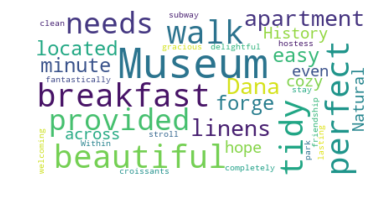

In [12]:
# Start with one review:
#text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
#Word Cloud : step 1
textword = " ".join(review for review in newdf.comments)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 331468284 words in the combination of all review.


In [34]:
import nltk
from nltk.corpus import stopwords
 #set(stopwords.words('english'))

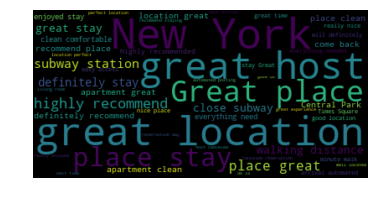

In [35]:
# Step 2: Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["room", "bathroom", "living room", "while", "new york", "place", "really",
  #               "definitely", "station"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=50, background_color="black").generate(textword)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# Save the image in the img folder:
wordcloud.to_file("./img/dec_review-black.png")

# Male Reviewers

In [11]:
#df for male
male18

,listing_id,id,date,reviewer_id,reviewer_name,comments,gender
7,21456,51110,2010-06-08,134469,Alex,Dana was really helpful. The apartment is in a...,male
10,21456,101596,2010-09-20,236007,Brendan,What a wonderful experience!!! Dana was very ...,male
12,21456,165092,2011-01-04,282956,Paolo,What about Dana? She was great even if she was...,male
16,21456,246343,2011-05-01,412679,Christer,We had a very satisfying week in NYC. Dana was...,male
18,21456,315653,2011-06-15,261065,William,Dana's place is clean and cosy and an easy wal...,male
19,21456,481199,2011-08-28,830511,Alberto,It was a great stay in Dana's apartment.\r\nAl...,male
21,21456,826112,2012-01-02,1499175,Robert,"As this was our first experience using airbnb,...",male
23,21456,1088699,2012-04-06,1588334,Gabriel,"Apartment is great, very close to two metro st...",male
29,21456,5920403,2013-07-22,2773258,Martin,What a wonderful time we had. The apartment wa...,male
30,21456,6490807,2013-08-14,7317098,Mike,This was our first trip to NYC and the first t...,male


In [27]:
textMale = " ".join(review for review in male18.comments)
print ("There are {} words in the combination of all MALE review.".format(len(textMale)))

There are 108797792 words in the combination of all MALE review.


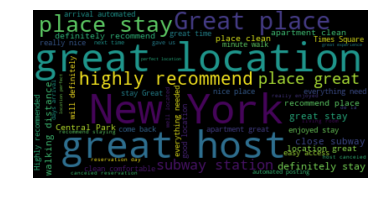

In [28]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["room", "bathroom", "living room", "stay", "while", "new york", "place", "really","definitely", "station"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=50, background_color="black").generate(textMale)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# Save the image in the img folder:
wordcloud.to_file("./img/dec_review-black-male3.png")

# Female Reviewers

In [30]:
textfeme = " ".join(review for review in female18.comments)
print ("There are {} words in the combination of all FEMALE review.".format(len(textfeme)))

There are 141707343 words in the combination of all FEMALE review.


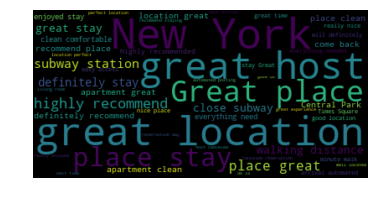

In [36]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["great"])

# Generate a word cloud image
wordcloudF = WordCloud(stopwords=stopwords, background_color="black").generate(textfeme)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
# Save the image in the img folder:
wordcloudF.to_file("./img/dec_review-black-female2.png")